In [1]:
!pip freeze > ../requirements.txt

In [2]:
import os
import sys
sys.path.append(r'..')

import pandas as pd
from scripts.data_analysis import *
from scripts.visualization import *
from scripts.financial_analysis import *
from scripts.data_transformation import *
from scripts.data_analysis import summarize_data
from utils.data_loaders import load_yfinance_data


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\env\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
datasets_folder = os.path.join(r"../datasets/raw/yfinance_data")
dataframes = load_yfinance_data(datasets_folder)

for df in dataframes.values():
    df['Date'] = pd.to_datetime(df['Date'])
dataframes 

2024-12-18 08:52:51,958 - INFO - Loading AAPL_historical_data.csv...
2024-12-18 08:52:52,092 - INFO - AAPL_historical_data.csv loaded successfully!
2024-12-18 08:52:52,094 - INFO - Loading AMZN_historical_data.csv...
2024-12-18 08:52:52,130 - INFO - AMZN_historical_data.csv loaded successfully!
2024-12-18 08:52:52,132 - INFO - Loading GOOG_historical_data.csv...
2024-12-18 08:52:52,204 - INFO - GOOG_historical_data.csv loaded successfully!
2024-12-18 08:52:52,219 - INFO - Loading META_historical_data.csv...
2024-12-18 08:52:52,294 - INFO - META_historical_data.csv loaded successfully!
2024-12-18 08:52:52,295 - INFO - Loading MSFT_historical_data.csv...
2024-12-18 08:52:52,366 - INFO - MSFT_historical_data.csv loaded successfully!
2024-12-18 08:52:52,368 - INFO - Loading NVDA_historical_data.csv...
2024-12-18 08:52:52,420 - INFO - NVDA_historical_data.csv loaded successfully!
2024-12-18 08:52:52,421 - INFO - Loading TSLA_historical_data.csv...
2024-12-18 08:52:52,468 - INFO - TSLA_histo

{'AAPL':             Date        Open        High         Low       Close   Adj Close  \
 0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
 1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
 2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
 3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
 4     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
 ...          ...         ...         ...         ...         ...         ...   
 10993 2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
 10994 2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
 10995 2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
 10996 2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
 10997 2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   
 
           Volume 

In [4]:
df_AAPL = dataframes['AAPL']
df_AMZN = dataframes['AMZN']
df_GOOG = dataframes['GOOG']
df_META = dataframes['META']
df_MSFT = dataframes['MSFT']
df_NVDA = dataframes['NVDA']
df_TSLA = dataframes['TSLA']

In [5]:
for ticker, df in dataframes.items():
    indicators = calculate_technical_indicators(df)
    # [df.__setitem__(indicator, values) for indicator, values in indicators.items()]
    for indicator, values in indicators.items():
        df[indicator] = values

tickers = dataframes.keys()
tickers

dict_keys(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA'])

In [6]:
selected_tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
strategy_returns = get_strategy_returns(dataframes, selected_tickers)
strategy_returns

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,-0.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,-0.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-07-24,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2024-07-25,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
2024-07-26,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\env\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.479%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,1980-12-15
End date,2024-07-30
Total months,523
,Backtest
Annual return,-1.479%
Cumulative returns,-47.817%
Annual volatility,12.685%
Sharpe ratio,-0.05
Calmar ratio,-0.02
Stability,0.48
Max drawdown,-60.324%


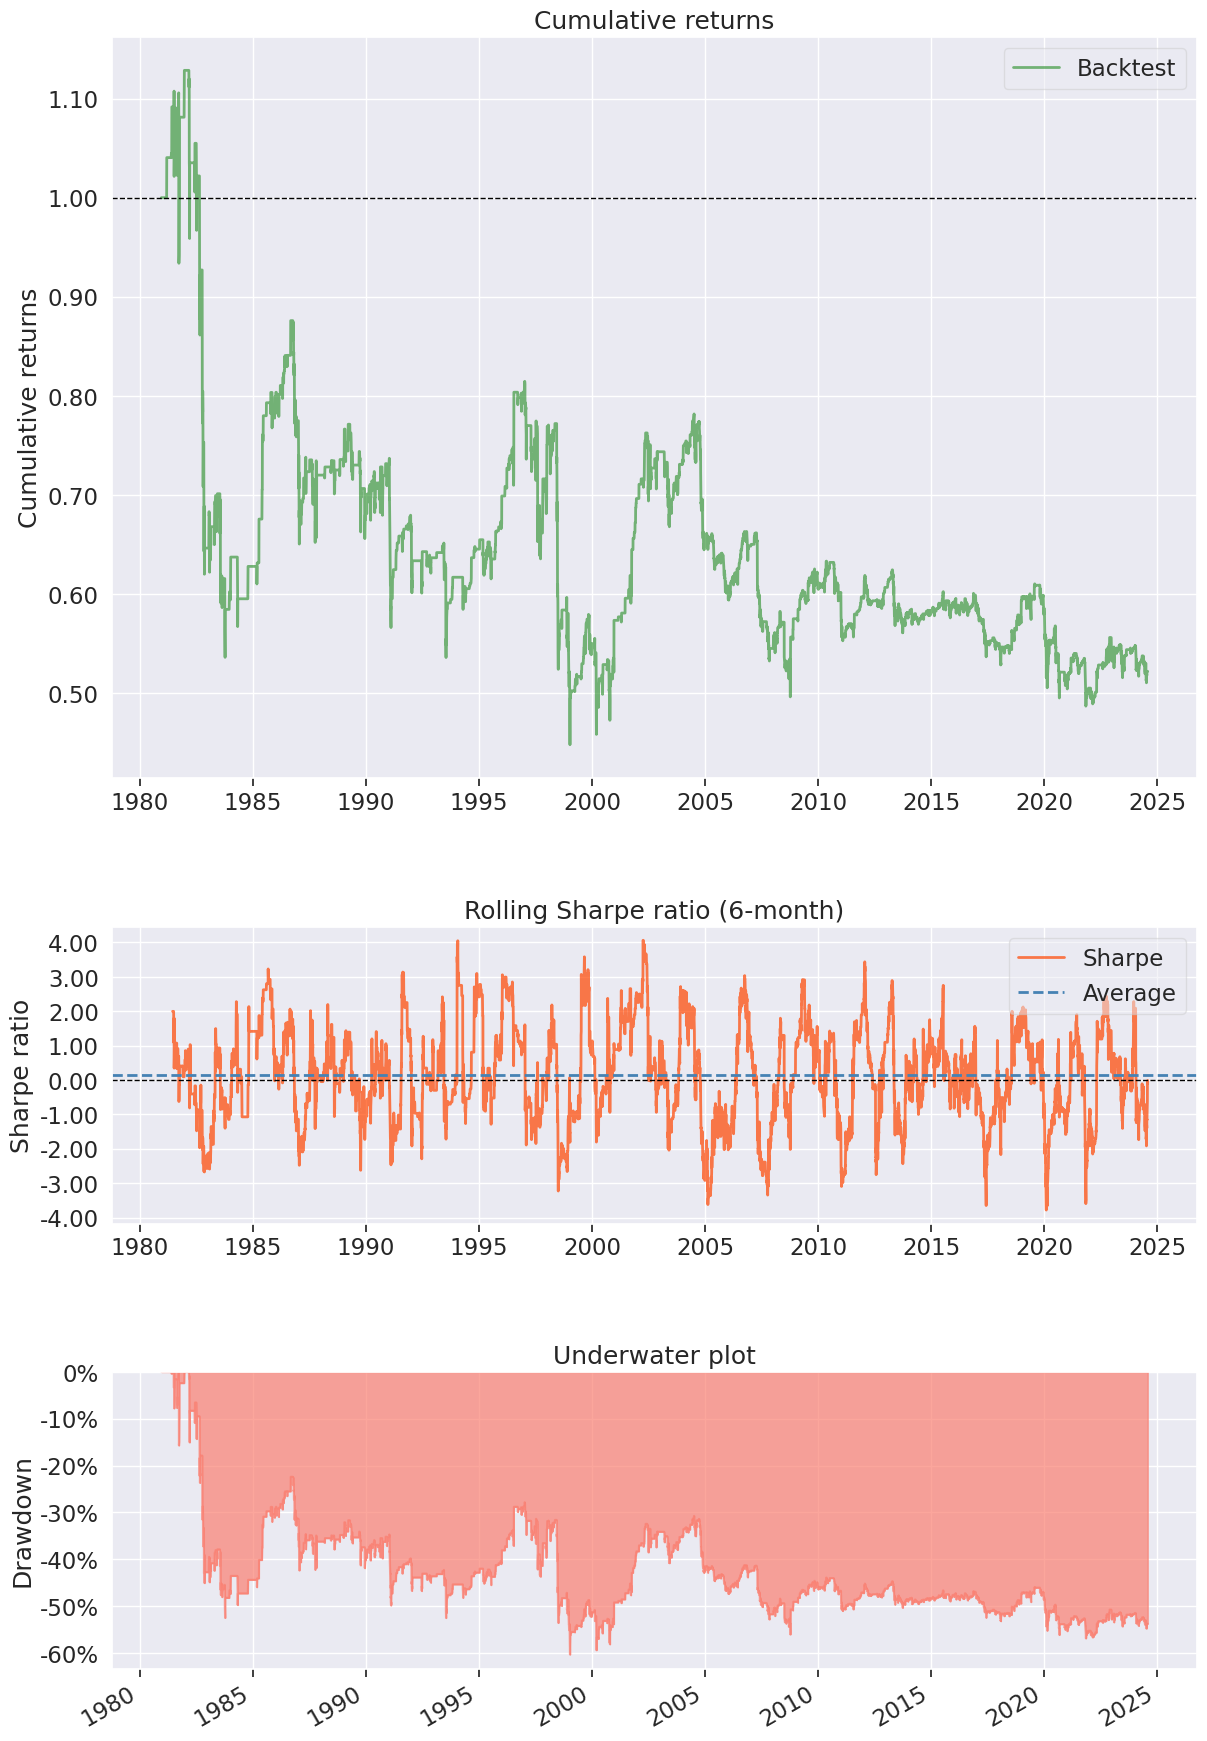

In [7]:
create_performance_tear_sheet_multiple(strategy_returns, tickers = selected_tickers)

In [8]:
optimize_portfolio(strategy_returns, risk_free_rate=0.0, method='sharpe')

{'weights': [1.0866615603814092e-16,
  0.01992451761241502,
  0.06898435136443473,
  0.5589206419061975,
  0.3521704891169522,
  0.0,
  5.744785201202106e-16],
 'performance': {'return': np.float64(0.04465126226459737),
  'volatility': np.float64(0.09825422063796489),
  'sharpe_ratio': np.float64(0.45444625151649076)}}